In [402]:
import pandas as pd
import numpy as np
from IPython.display import display
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import locale
import pixiedust
import math

In [403]:
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [ ]:
# always display all columns in the dataframe 
pd.options.display.max_columns = None

In [411]:
#function for removing the commas from the database

def my_containsAny(str, set):
    for c in set:
        if c in str: return 1;
    return 0

def remove_commas(df):
    for column in df:
        index = -1
        for i in df[column]:
            index = index +  1
            if type(i) == str:
                #print("this is a string: " + i)
                if my_containsAny(i, ',') == 1:
                    #print("replacing the commas in this string: ", i)
                    i = i.replace(',', '')
                    #print("this no longer has commas: " + i)
                    i = float(i)
                    #print("this was a string but now it is a float: %f, " % (i) )
                    df[column][index] = i
                else: 
                    i = float(i)
                    df[column][index] = i
                    #print("this was a string  but now it is a float: %f" % (i) )
            else:
                print(i)
    return 
# print(df[column])

## Primary Education Ratio 

In [456]:
df_prim_educ = pd.read_csv('primary_educ_1978.csv')
df_prim_educ.

Back to Table of Contents           Unnamed: 1  \
0    Table 2.1 - Primary Enrolment and Gross Enrolm...                  NaN   
1                                                  NaN                  NaN   
2                                                 Year  Island of Mauritius   
3                                                  NaN            Enrolment   
4                                                  NaN                Total   
5                                                 1972              151,614   
6                                                 1973              150,656   
7                                                 1974              148,142   
8                                                 1975              145,475   
9                                                 1976              139,439   
10                                                1977              136,019   
11                                                1978              133,432   
12                                                1979              125,165   
13                                                1980              123,710   
14                                                1981              130,145   
15                                                1982              131,594   
16                                                1983              133,255   
17                                                1984              129,744   
18                                                1985              135,012   
19                                                1986              138,765   
20                                                1987              137,935   
21                                                1988              134,136   
22                                                1989              131,626   
23                                                1990              131,203   
24                                                1991              129,154   
25                                                1992              123,931   
26                                                1993              120,002   
27                                                1994              117,919   
28                                                1995              117,795   
29                                                1996              119,655   
30                                                1997              122,312   
31                                                1998              125,681   
32                                                1999              128,745   
33                                                2000              130,464   
34                                                2001              129,350   
35                                                2002              127,785   
36                                                2003              124,933   
37                                                2004              121,526   
38                                                2005              118,737   
39                                                2006              116,513   
40                                                2007              114,404   
41                                                2008              114,007   
42                                                2009              112,884   
43                                                2010              112,309   
44                                                2011              110,907   
45                                                2012              108,519   
46                                                2013              103,641   
47                                                2014              100,221   
48                                                2015               96,365   
49                                                2016               92,529   


In [458]:
# dropping all rows and columns without data 
df_prim_educ.dropna(axis = 0, how = 'all', inplace = True)
df_prim_educ.dropna(axis = 1, how = 'all', inplace = True)
df_prim_educ.drop(labels= [0, 4, 2, 3, 51], inplace = True)

# only looking at data from the island of Mauritius because it has a longer history 
df_prim_educ.drop(df_prim_educ.columns[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1, inplace=True)

# reset the index to be years
df_prim_educ.set_index('Back to Table of Contents', inplace = True)
df_prim_educ.index.rename('Years', inplace = True)

# define a new dictionary to hold the new names of the columns 
newcolumns = [('Enrolment_Total'), ('Enrolment_Male'), ('Enrolment_Female'),
                          ('Pop_Total'), ('Pop_Male'), ('Pop_Female'),
                          ('Ratio_Total'), ('Ratio_Male'), ('Ratio_Female')]
newdict = dict(zip(df_prim_educ.columns, newcolumns))

# rename the columns
df_prim_educ.rename(columns = newdict, inplace = True)

# remove the commas and set strings in the dataframe as floats 
remove_commas(df_prim_educ)

display(df_prim_educ.head())


Enrolment_Total Enrolment_Male Enrolment_Female Pop_Total Pop_Male  \
Years                                                                      
1972           151614          77401            74213    142800    72239   
1973           150656          76812            73844    142695    72107   
1974           148142          75546            72596    139965    70663   
1975           145475          74220            71255    135568    68351   
1976           139439          71077            68362    131453    66368   

      Pop_Female Ratio_Total Ratio_Male Ratio_Female  
Years                                                 
1972       70561         106        107          105  
1973       70588         106        107          105  
1974       69302         106        107          105  
1975       67217         107        109          106  
1976       65085         106        107          105

#### Primary School Enrolment vs Total Population of Primary Aged Students

<function matplotlib.pyplot.show(*args, **kw)>

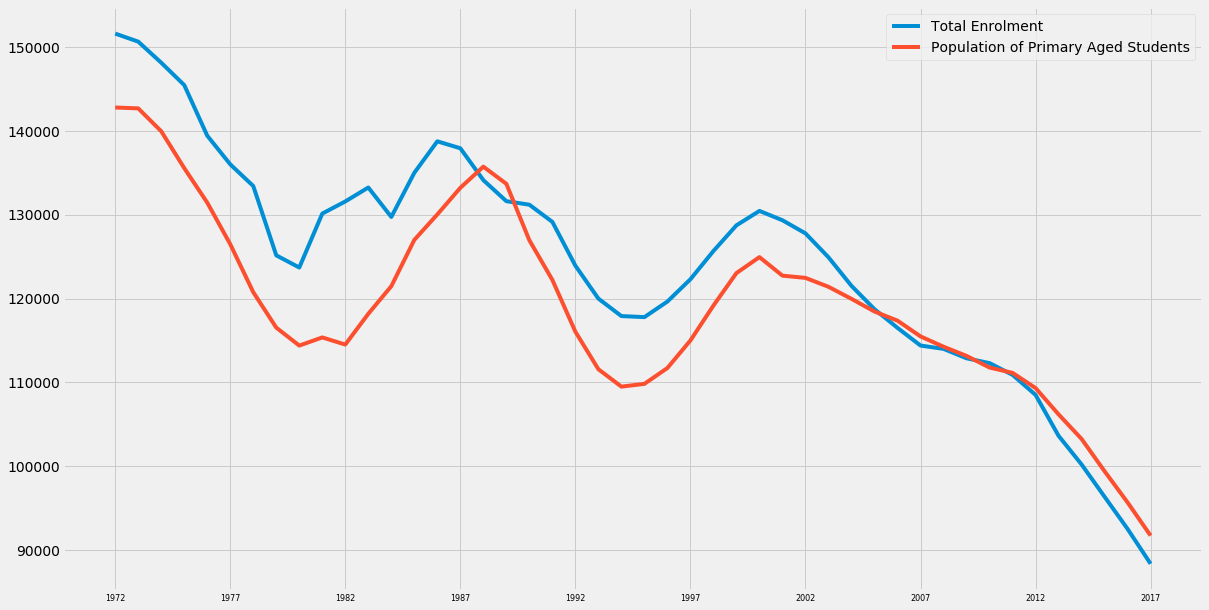

In [460]:
# why is the enrolment greater than the pop at certain times?
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Total']
z = df_prim_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Total Enrolment', 'Population of Primary Aged Students'])
plt.show

#### Male vs Female Primary School Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

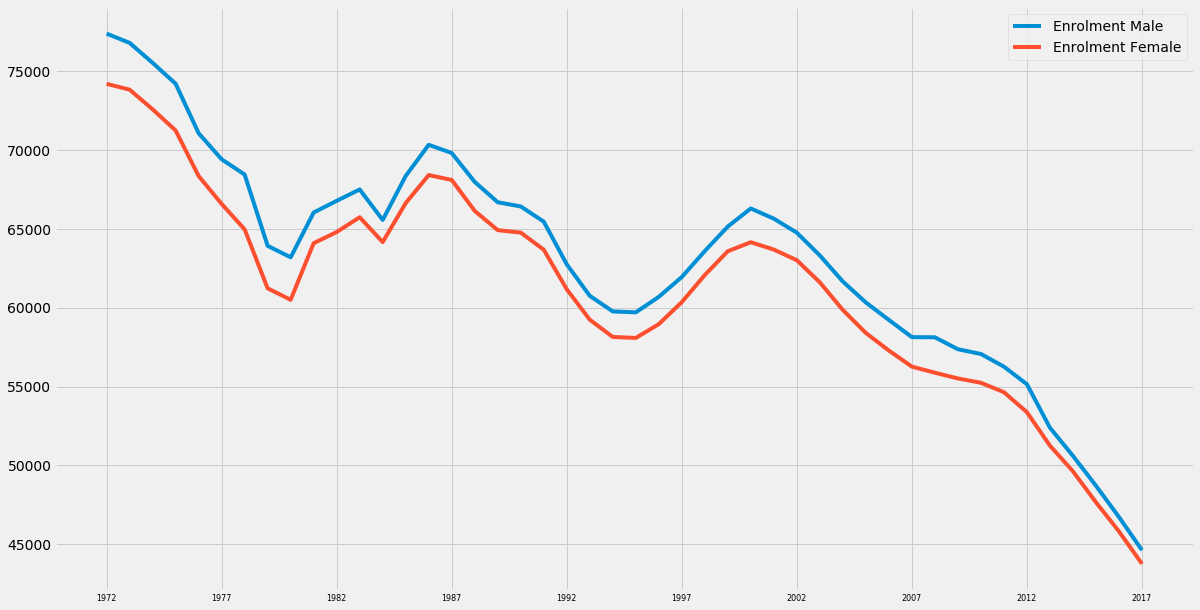

In [397]:
x = df_prim_educ.index
y = df_prim_educ['Enrolment_Male']
z = df_prim_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.show

#### Ratios of Male vs Female Primary Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

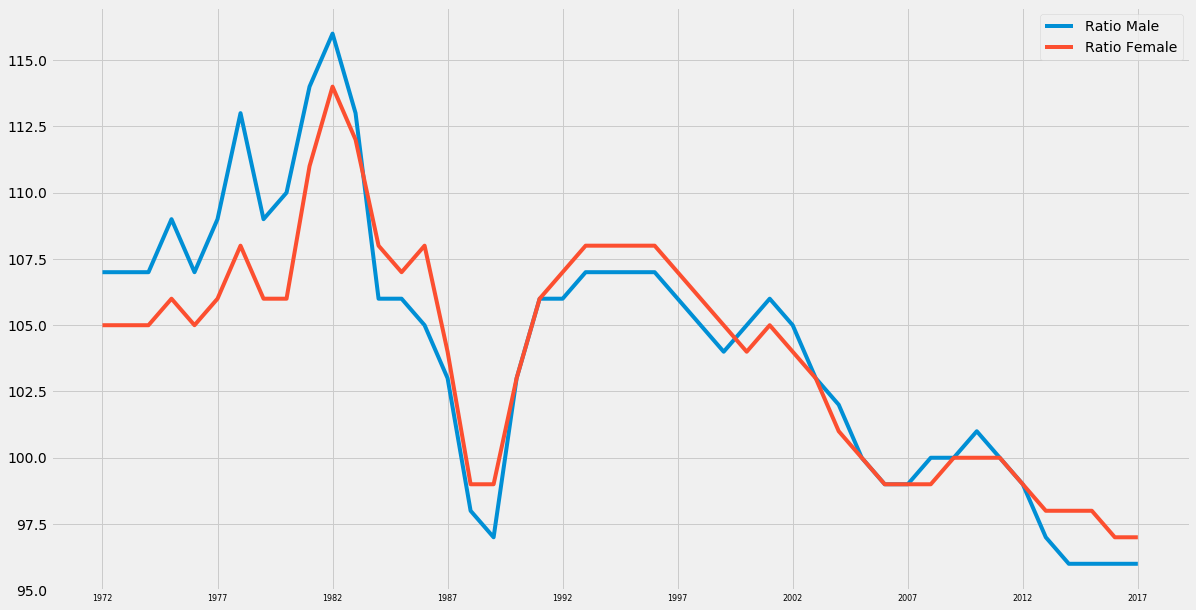

In [398]:
x = df_prim_educ.index
y = df_prim_educ['Ratio_Male']
z = df_prim_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Ratio Male','Ratio Female'])
plt.show

## Secondary Education Ratios

In [463]:
df_sec_educ = pd.read_csv('sec_educ_ratio.csv')
df_sec_educ.head()

Back to Table of Contents           Unnamed: 1  \
0  Table 3.1 - Secondary Enrolment and Gross Enro...                  NaN   
1                                           General                   NaN   
2                                               Year  Island of Mauritius   
3                                                NaN           Enrolment    
4                                                NaN               Total    

  Unnamed: 2 Unnamed: 3              Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0        NaN        NaN                     NaN        NaN        NaN   
1        NaN        NaN                     NaN        NaN        NaN   
2        NaN        NaN                     NaN        NaN        NaN   
3        NaN        NaN   Population (12 - 19)         NaN        NaN   
4      Male     Female                   Total       Male     Female    

              Unnamed: 7 Unnamed: 8 Unnamed: 9          Unnamed: 10  \
0                    NaN        NaN        NaN                  NaN   
1                    NaN        NaN        NaN                  NaN   
2                    NaN        NaN        NaN  Island of Rodrigues   
3  Gross Enrolment Ratio        NaN        NaN           Enrolment    
4                 Total       Male     Female                Total    

  Unnamed: 11 Unnamed: 12             Unnamed: 13 Unnamed: 14 Unnamed: 15  \
0         NaN         NaN                     NaN         NaN         NaN   
1         NaN         NaN                     NaN         NaN         NaN   
2         NaN         NaN                     NaN         NaN         NaN   
3         NaN         NaN   Population (12 - 19)          NaN         NaN   
4       Male      Female                   Total        Male      Female    

             Unnamed: 16 Unnamed: 17 Unnamed: 18            Unnamed: 19  \
0                    NaN         NaN         NaN                    NaN   
1                    NaN         NaN         NaN                    NaN   
2                    NaN         NaN         NaN  Republic of Mauritius   
3  Gross Enrolment Ratio         NaN         NaN             Enrolment    
4                 Total        Male      Female                  Total    

  Unnamed: 20 Unnamed: 21             Unnamed: 22 Unnamed: 23 Unnamed: 24  \
0         NaN         NaN                     NaN         NaN         NaN   
1         NaN         NaN                     NaN         NaN         NaN   
2         NaN         NaN                     NaN         NaN         NaN   
3         NaN         NaN   Population (12 - 19)          NaN         NaN   
4       Male      Female                   Total        Male      Female    

             Unnamed: 25 Unnamed: 26 Unnamed: 27  Unnamed: 28  Unnamed: 29  \
0                    NaN         NaN         NaN          NaN          NaN   
1                    NaN         NaN         NaN          NaN          NaN   
2                    NaN         NaN         NaN          NaN          NaN   
3  Gross Enrolment Ratio         NaN         NaN          NaN          NaN   
4                 Total        Male      Female           NaN          NaN   

   Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 35  Unnamed: 36  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

In [464]:
# dropping all rows and columns without data 
df_sec_educ.dropna(axis = 0, how = 'all', inplace = True)
df_sec_educ.dropna(axis = 1, how = 'all', inplace = True)
df_sec_educ.drop(labels=[0, 1, 4, 2, 3, 51], inplace = True)

# only looking at data from the island of Mauritius because it has a longer history 
df_sec_educ.drop(df_sec_educ.columns[[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1, inplace=True)

# reset the index
df_sec_educ.set_index('Back to Table of Contents', inplace = True)
df_sec_educ.index.rename('Years', inplace = True)

# rename the columns using a dict defined previously 
df_sec_educ.rename(columns = newdict, inplace = True)

# remove commas and turn strings to floats 
remove_commas(df_sec_educ)

df_sec_educ.head()

Enrolment_Total Enrolment_Male Enrolment_Female Pop_Total Pop_Male  \
Years                                                                      
1972            52030          30551            21479    165855    83038   
1973            55619          31929            23690    166604    83612   
1974            60116          33815            26301    171247    86099   
1975            63142          35112            28030    174930    88210   
1976            66920          36616            30304    178280    89864   

      Pop_Female Ratio_Total Ratio_Male Ratio_Female  
Years                                                 
1972       82817          31         37           26  
1973       82992          33         38           29  
1974       85148          35         39           31  
1975       86720          36         40           32  
1976       88416          38         41           34

#### Enrolment vs Total Population of Secondary-School Aged Students

<function matplotlib.pyplot.show(*args, **kw)>

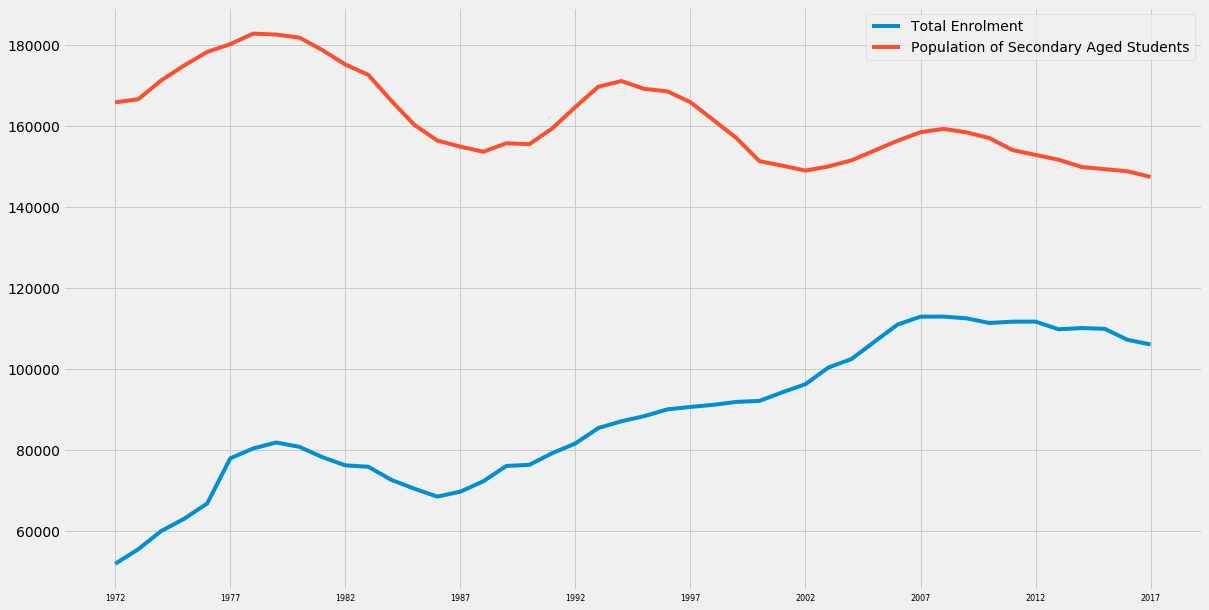

In [466]:
# why is the enrolment greater than the pop at certain times?
x = df_prim_educ.index
y = df_sec_educ['Enrolment_Total']
z = df_sec_educ['Pop_Total']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Total Enrolment','Population of Secondary Aged Students'])
plt.show

#### Male vs Female Secondary School Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

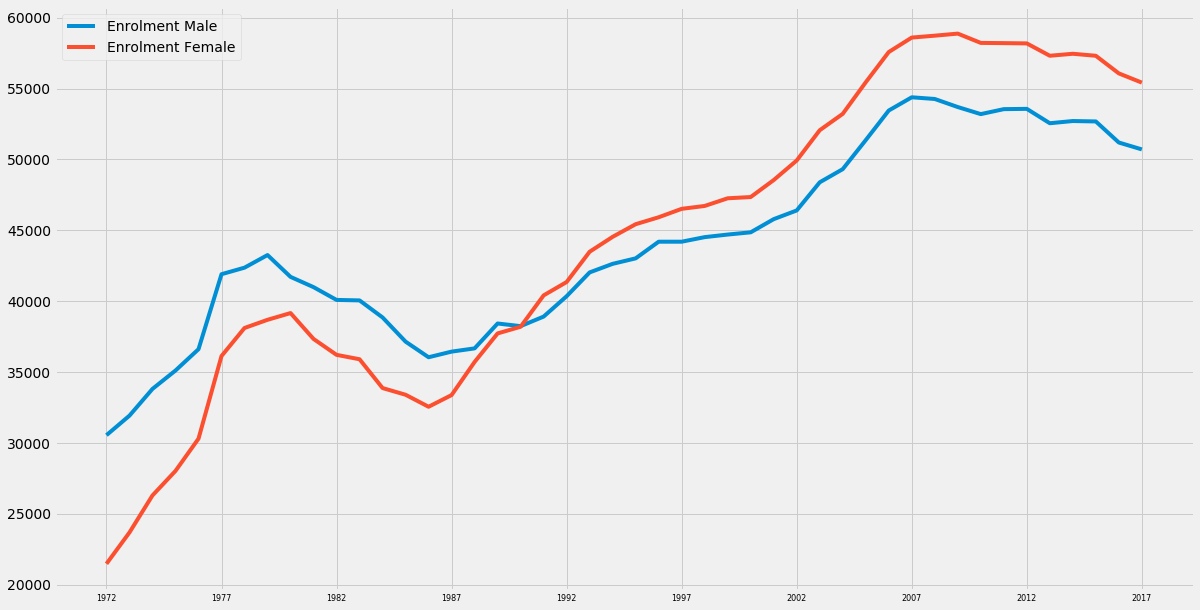

In [467]:
x = df_sec_educ.index
y = df_sec_educ['Enrolment_Male']
z = df_sec_educ['Enrolment_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Enrolment Male','Enrolment Female'])
plt.show

#### Ratios of Male vs Female Secondary Enrolment

<function matplotlib.pyplot.show(*args, **kw)>

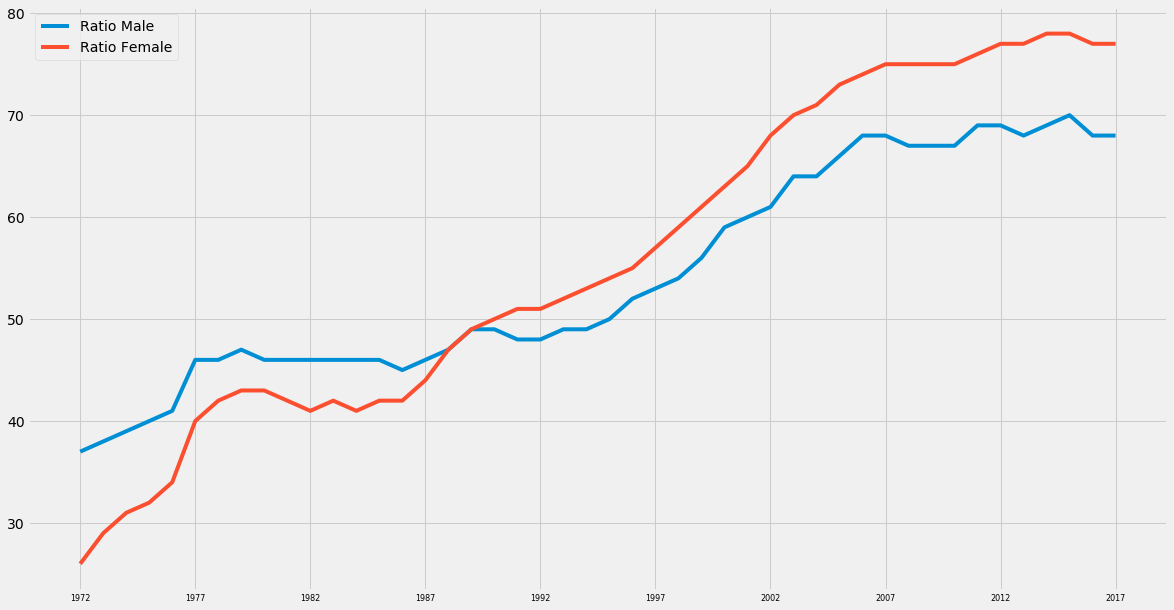

In [468]:
x = df_sec_educ.index
y = df_sec_educ['Ratio_Male']
z = df_sec_educ['Ratio_Female']


fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(121)

# figure out number of data points to show 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.tick_params(axis='x', labelsize=8)


plt.plot(x,y,z)
plt.legend(['Ratio Male','Ratio Female'])
plt.show